The data which is used in this project has been collected from cars24 website for 10 popular cities across the country. Only used cars data has been collected.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import re

In [2]:
df = pd.read_csv("cars-data-scrape.csv",index_col =0)

In [3]:
df.head()

,Location,Type,Brand,Model,Variant,Year,Kilometers,No_of_owners,Fuel,Transmission,Price
0,New Delhi,Hatchback,Maruti,Swift MANUAL,LXI,2020,3570,1,Petrol,MANUAL,580799
1,New Delhi,Hatchback,Maruti,Swift MANUAL,LXI,2020,1755,1,Petrol,MANUAL,571399
2,New Delhi,Hatchback,Maruti,S PRESSO MANUAL,VXI PLUS,2020,17058,1,Petrol,MANUAL,437299
3,New Delhi,Hatchback,Maruti,Alto 800 MANUAL,VXI,2014,5383,1,Petrol,MANUAL,291699
4,New Delhi,Hatchback,Maruti,Alto K10 MANUAL,LXI,2015,10957,1,Petrol,MANUAL,295299


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5045 entries, 0 to 5044
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Location      5045 non-null   object
 1   Type          5045 non-null   object
 2   Brand         5045 non-null   object
 3   Model         5045 non-null   object
 4   Variant       5045 non-null   object
 5   Year          5045 non-null   int64 
 6   Kilometers    5045 non-null   int64 
 7   No_of_owners  5045 non-null   int64 
 8   Fuel          5045 non-null   object
 9   Transmission  4864 non-null   object
 10  Price         5045 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 473.0+ KB


In Transmission column there are few null values.

Trying to fill the nulls, we can notice that the type of transmission is appended to the values in the model column

In [5]:
df[["Model","Transmission"]][df["Transmission"].isnull()]

,Model,Transmission
75,S PRESSO,NaN
100,Redi Go,NaN
295,SX4,NaN
301,Swift Dzire,NaN
311,Ciaz,NaN
...,...,...
4958,VENUE,NaN
5004,Creta,NaN
5030,S Cross,NaN
5033,Creta,NaN


There are around 181 rows with null values and there is no type of transmission appened to the values in model column. 

So we cant fill the nulls with just model column, lets check with variant and fuel type with model specific.

In [6]:
df["Model"][df["Transmission"].isnull()].unique()

array(['S PRESSO', 'Redi Go', 'SX4', 'Swift Dzire', 'Ciaz', 'City',
       'YARIS', 'VENUE', 'TRIBER', 'XL6', 'Creta', 'Corolla Altis', 'A4',
       'XUV500', 'Q3', 'Alto K10', 'IGNIS', 'Grand i10', 'Baleno',
       'Xcent', 'Etios', 'Vento', 'Harrier', 'Ecosport', 'Bolero',
       'Vitara Brezza', 'Benz C Class', 'Compass', 'Polo', 'Elite i20',
       'GRAND I10 NIOS', 'Kwid', 'Sunny', 'Amaze', 'XUV 3OO',
       'New Elantra', 'New Figo', 'City ZX', 'TUV300', 'KUV 100 NXT',
       'XCENT PRIME', 'S Cross'], dtype=object)

First, lets remove the type of transmission which is appended in model columns and make all the values to lower case.

In [7]:
df1 = df.copy()

In [8]:
for i in range(len(df1["Model"])):
    t = df1["Model"][i].lower().replace("manual",'').replace("automatic",'')
    t = re.sub(r'\s+',' ',t)
    df1["Model"][i] = t.strip()

<ipython-input-8-e5b031a4d17c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Model"][i] = t.strip()


In [9]:
df1["Model"][5:10]

5    grand i10 nios
6          alto 800
7             swift
8            baleno
9              kwid
Name: Model, dtype: object

In [10]:
null_list = df1["Model"][df["Transmission"].isnull()].unique()

In [11]:
fill_nulls = dict()
for i in null_list:
    try:
        print(i, "\n", df1["Transmission"][df1["Model"] == i].mode(), df1["Transmission"][df1["Model"] == i].shape)
        fill_nulls[i] = df1["Transmission"][df1["Model"] == i].mode()[0]
    except:
        pass

s presso 
 0    MANUAL
dtype: object (26,)
redi go 
 0    MANUAL
dtype: object (15,)
sx4 
 0    MANUAL
dtype: object (6,)
swift dzire 
 0    MANUAL
dtype: object (358,)
ciaz 
 0    MANUAL
dtype: object (60,)
city 
 0    MANUAL
dtype: object (173,)
yaris 
 0    MANUAL
dtype: object (8,)
venue 
 0    MANUAL
dtype: object (49,)
triber 
 0    MANUAL
dtype: object (18,)
xl6 
 0    MANUAL
dtype: object (8,)
creta 
 0    MANUAL
dtype: object (142,)
corolla altis 
 0    MANUAL
dtype: object (101,)
a4 
 0    AUTOMATIC
dtype: object (11,)
xuv500 
 0    MANUAL
dtype: object (131,)
q3 
 0    AUTOMATIC
dtype: object (19,)
alto k10 
 0    MANUAL
dtype: object (153,)
ignis 
 0    MANUAL
dtype: object (24,)
grand i10 
 0    MANUAL
dtype: object (175,)
baleno 
 0    MANUAL
dtype: object (126,)
xcent 
 0    MANUAL
dtype: object (28,)
etios 
 0    MANUAL
dtype: object (26,)
vento 
 0    MANUAL
dtype: object (46,)
harrier 
 0    MANUAL
dtype: object (6,)
ecosport 
 0    MANUAL
dtype: object (133,)
bolero 

In [12]:
fill_nulls

{'s presso': 'MANUAL',
 'redi go': 'MANUAL',
 'sx4': 'MANUAL',
 'swift dzire': 'MANUAL',
 'ciaz': 'MANUAL',
 'city': 'MANUAL',
 'yaris': 'MANUAL',
 'venue': 'MANUAL',
 'triber': 'MANUAL',
 'xl6': 'MANUAL',
 'creta': 'MANUAL',
 'corolla altis': 'MANUAL',
 'a4': 'AUTOMATIC',
 'xuv500': 'MANUAL',
 'q3': 'AUTOMATIC',
 'alto k10': 'MANUAL',
 'ignis': 'MANUAL',
 'grand i10': 'MANUAL',
 'baleno': 'MANUAL',
 'xcent': 'MANUAL',
 'etios': 'MANUAL',
 'vento': 'MANUAL',
 'harrier': 'MANUAL',
 'ecosport': 'MANUAL',
 'bolero': 'MANUAL',
 'vitara brezza': 'MANUAL',
 'benz c class': 'MANUAL',
 'compass': 'MANUAL',
 'polo': 'MANUAL',
 'elite i20': 'MANUAL',
 'grand i10 nios': 'MANUAL',
 'kwid': 'MANUAL',
 'sunny': 'MANUAL',
 'amaze': 'MANUAL',
 'xuv 3oo': 'MANUAL',
 'new elantra': 'AUTOMATIC',
 'new figo': 'MANUAL',
 'city zx': 'MANUAL',
 'tuv300': 'MANUAL',
 'kuv 100 nxt': 'MANUAL',
 's cross': 'MANUAL'}

In [13]:
null_index = df1["Model"][df1["Transmission"].isnull()].index

In [14]:
print(len(null_index))
null_index

181


Int64Index([  75,  100,  295,  301,  311,  317,  318,  358,  380,  445,
            ...
            4865, 4885, 4922, 4954, 4957, 4958, 5004, 5030, 5033, 5035],
           dtype='int64', length=181)

In [15]:
for i in null_index:
    try:
        df1["Transmission"][i] = fill_nulls[df1["Model"][i]]
    except:
        df1["Transmission"][i] = "manual"

<ipython-input-15-5d4baa2d1769>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Transmission"][i] = fill_nulls[df1["Model"][i]]
<ipython-input-15-5d4baa2d1769>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Transmission"][i] = "manual"


All nulls have been filled including the one which has only one model in the entire data set. Therefore we filled it with manual.

In [16]:
df1["Transmission"][df1["Transmission"].isnull()]

Series([], Name: Transmission, dtype: object)

There are no more null values

In [17]:
df1.dtypes

Location        object
Type            object
Brand           object
Model           object
Variant         object
Year             int64
Kilometers       int64
No_of_owners     int64
Fuel            object
Transmission    object
Price            int64
dtype: object

Lets convert every string object to lower case

In [18]:
for c in ["Location","Type","Brand","Model","Variant","Fuel","Transmission"]:
    for i in range(df.shape[0]):
        df1[c][i] = df1[c][i].lower()
    

<ipython-input-18-7956e63c8e63>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[c][i] = df1[c][i].lower()


In [19]:
df1.head()

,Location,Type,Brand,Model,Variant,Year,Kilometers,No_of_owners,Fuel,Transmission,Price
0,new delhi,hatchback,maruti,swift,lxi,2020,3570,1,petrol,manual,580799
1,new delhi,hatchback,maruti,swift,lxi,2020,1755,1,petrol,manual,571399
2,new delhi,hatchback,maruti,s presso,vxi plus,2020,17058,1,petrol,manual,437299
3,new delhi,hatchback,maruti,alto 800,vxi,2014,5383,1,petrol,manual,291699
4,new delhi,hatchback,maruti,alto k10,lxi,2015,10957,1,petrol,manual,295299


<AxesSubplot:>

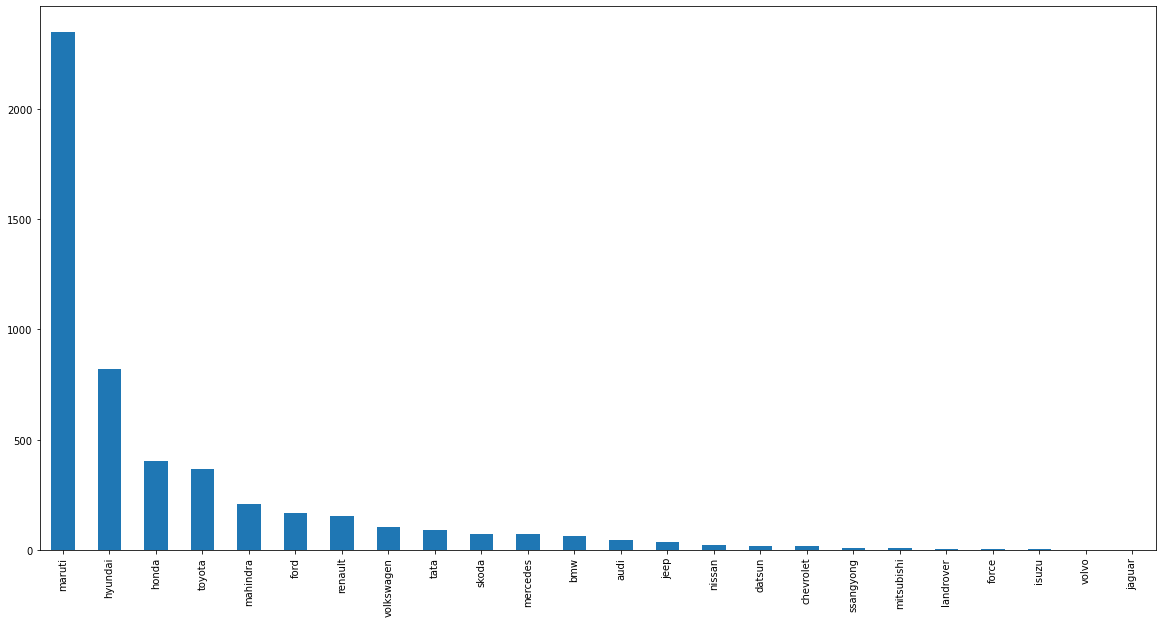

In [20]:
plt.figure(figsize = (20,10))
df1['Brand'].value_counts().plot(kind="bar")

from the above graph, we can see that maruti brand is almost in half of the dataset.

maruti, hyundai, honda, toyota, mahindra accounts to approximately 70% of the entire dataset

<AxesSubplot:>

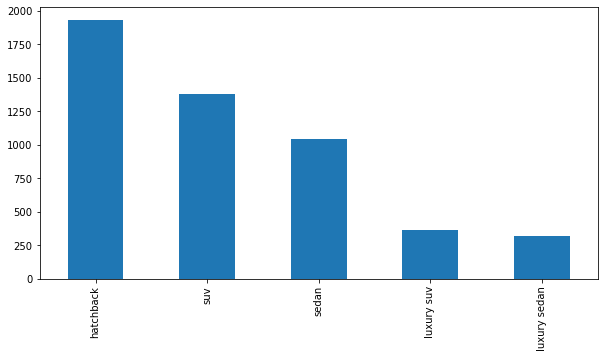

In [21]:
plt.figure(figsize = (10,5))
df1['Type'].value_counts().plot(kind="bar")

We can see that the luxury cars are very less.

re used hatchbacks and suvs are more in number.

As year column has much less impact as a continuous variable lets convert this into a new column with no.of.years used and as categorical column

In [22]:
No_of_years = []
for i in range(df1.shape[0]):
    No_of_years.append(2021 - df1["Year"][i])
    
df1["No_of_years"] = No_of_years

In [23]:
df2 = df1.drop(columns = ["Year"]).copy()

In [24]:
df2.head()

,Location,Type,Brand,Model,Variant,Kilometers,No_of_owners,Fuel,Transmission,Price,No_of_years
0,new delhi,hatchback,maruti,swift,lxi,3570,1,petrol,manual,580799,1
1,new delhi,hatchback,maruti,swift,lxi,1755,1,petrol,manual,571399,1
2,new delhi,hatchback,maruti,s presso,vxi plus,17058,1,petrol,manual,437299,1
3,new delhi,hatchback,maruti,alto 800,vxi,5383,1,petrol,manual,291699,7
4,new delhi,hatchback,maruti,alto k10,lxi,10957,1,petrol,manual,295299,6


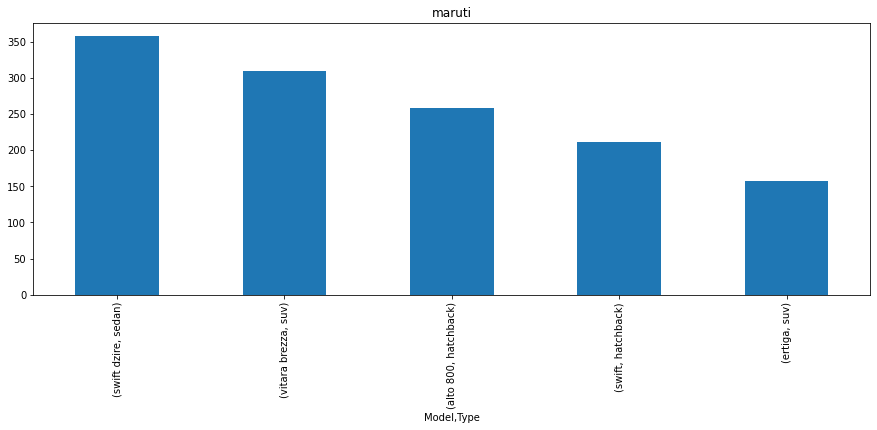

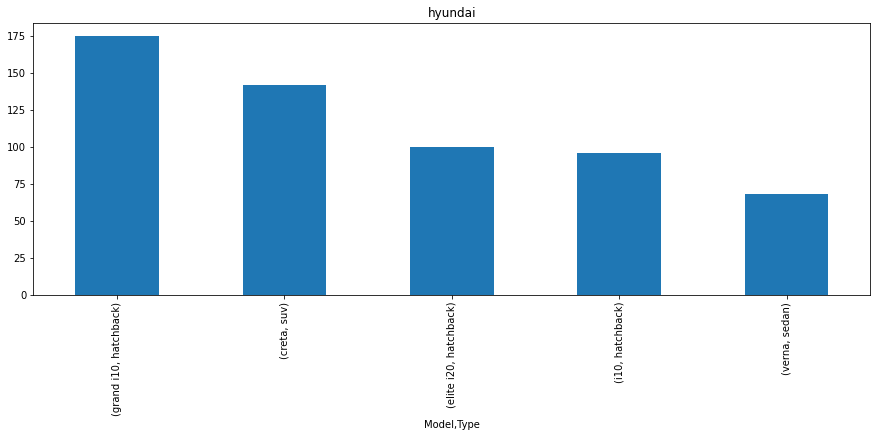

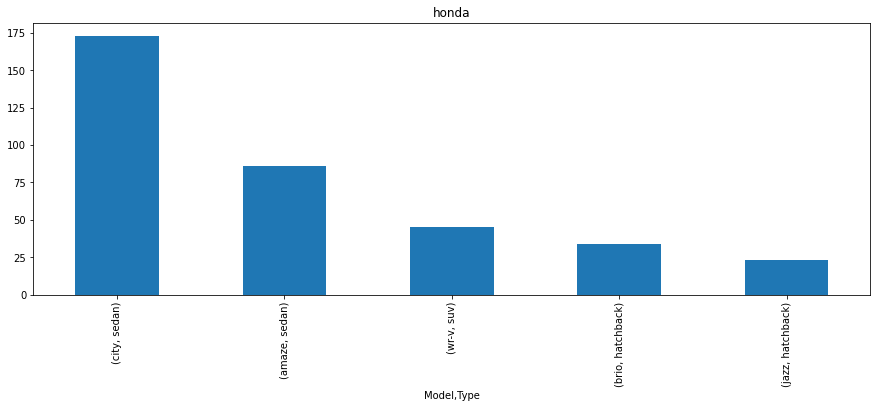

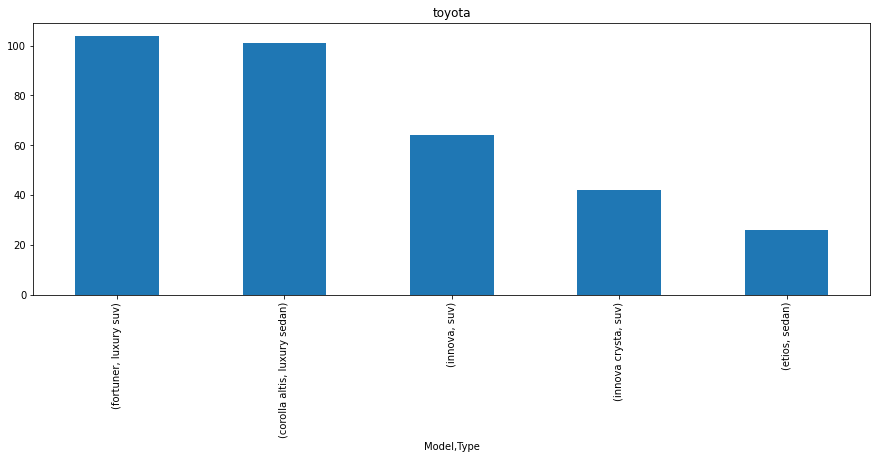

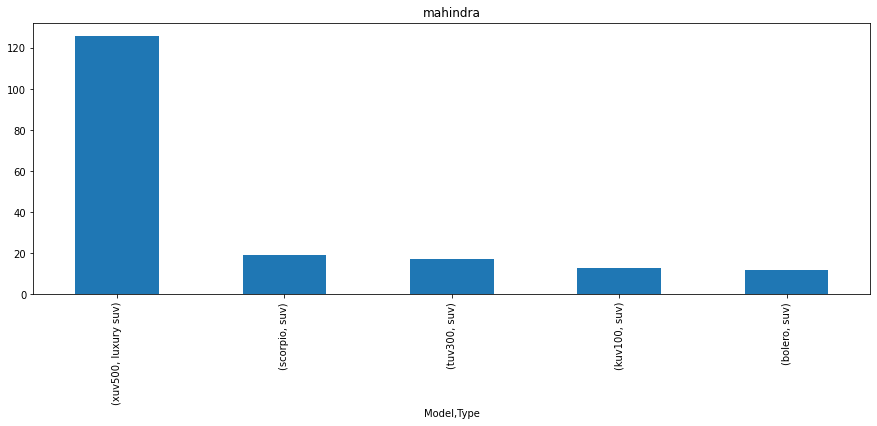

In [25]:
for i in ("maruti","hyundai","honda", "toyota", "mahindra"):
    plt.figure(figsize=(15,5))
    df2[["Model","Type"]][df2["Brand"]==i].value_counts()[0:5].plot(kind="bar",title = i)

in maruti -sedan -swift dezire is the top on the list of cars for sale.

in hyundai -hatchback -grand i10 is the top on the list of cars for sale.

in honda -sedan -city is the top on the list of cars for sale.

in toyota -luxury suv -fortuner is the top on the list of cars for sale.

in mahindra -suv -xuv500 is the top on the list of cars for sale.

<AxesSubplot:title={'center':'Fuel'}>

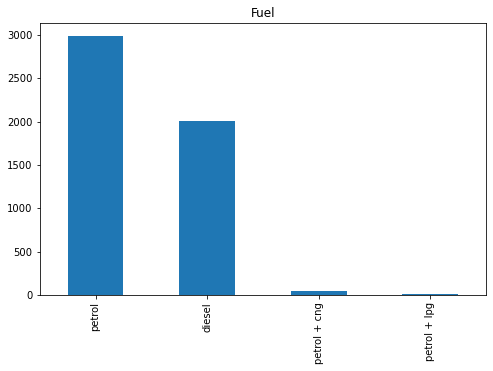

In [26]:
plt.figure(figsize=(8,5))
df2["Fuel"].value_counts().plot(kind="bar",title = "Fuel")

While petrol and diesel accounts for majority, there are few cars with petrol +cng and petrol+lpg

<AxesSubplot:title={'center':'Transmission'}>

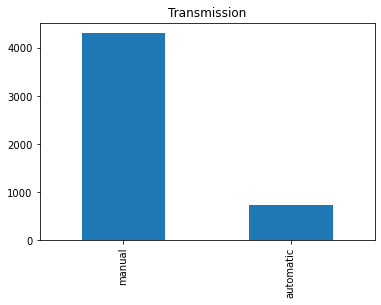

In [27]:
df2["Transmission"].value_counts().plot(kind="bar",title = "Transmission")

manual transmission cars are around 80% and the rest are automatic transmission cars

C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='No_of_years', ylabel='count'>

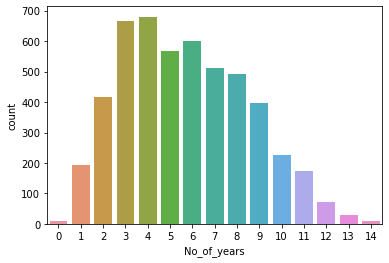

In [28]:
sns.countplot(df2["No_of_years"].sort_values())

Mostly when the car is 3-8 years old, it will be listed for a resale

<AxesSubplot:ylabel='Frequency'>

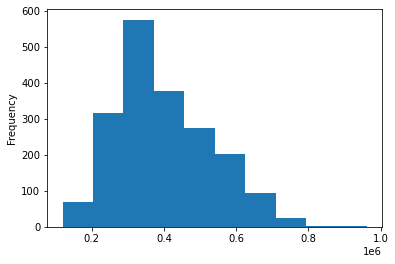

In [29]:
df2["Price"][df2["Type"]=="hatchback"].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

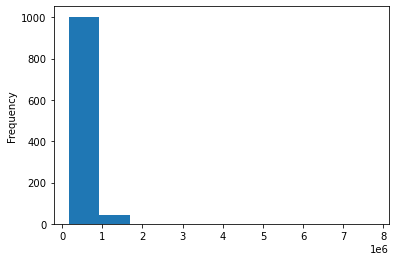

In [30]:
df2["Price"][df2["Type"]=="sedan"].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

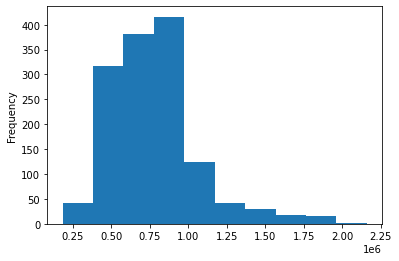

In [31]:
df2["Price"][df2["Type"]=="suv"].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

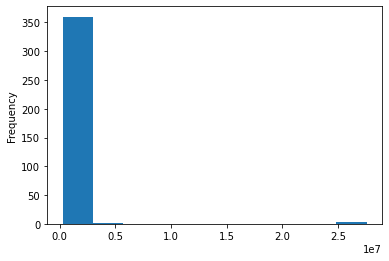

In [32]:
df2["Price"][df2["Type"]=="luxury suv"].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

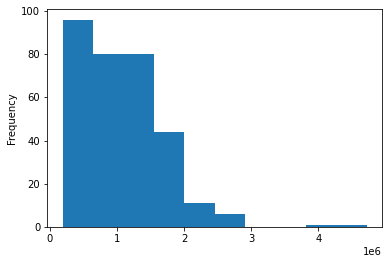

In [33]:
df2["Price"][df2["Type"]=="luxury sedan"].plot(kind='hist')

In [37]:
for i in df2["Type"].unique():
    print(i,"\n", df2[["No_of_years","Price"]][df2["Type"]==i].corr(),"\n")

hatchback 
              No_of_years     Price
No_of_years     1.000000 -0.612493
Price          -0.612493  1.000000 

sedan 
              No_of_years     Price
No_of_years     1.000000 -0.554964
Price          -0.554964  1.000000 

suv 
              No_of_years     Price
No_of_years     1.000000 -0.406582
Price          -0.406582  1.000000 

luxury sedan 
              No_of_years     Price
No_of_years     1.000000 -0.655786
Price          -0.655786  1.000000 

luxury suv 
              No_of_years     Price
No_of_years     1.000000 -0.163491
Price          -0.163491  1.000000 



It is obvious that as age of use increases the resale value decreases, but luxury suv value is decreased very less when compared to other car types.

C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fuel', ylabel='No_of_years'>

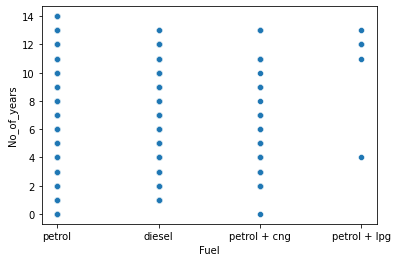

In [40]:
sns.scatterplot(df2["Fuel"],df2["No_of_years"])

Here, we can see that petrol+lpg cars are resaled mostly after 10 years of usage

C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AKHIL\anacond

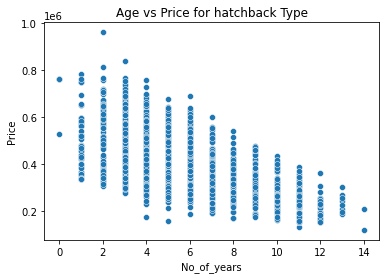

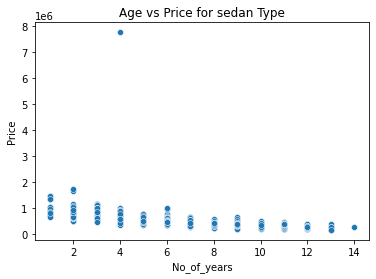

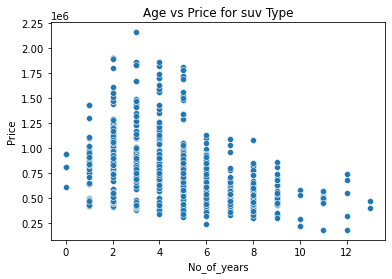

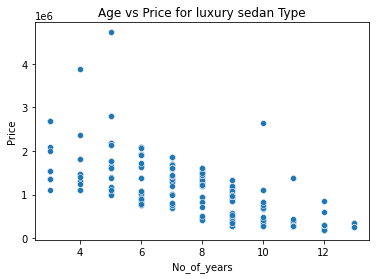

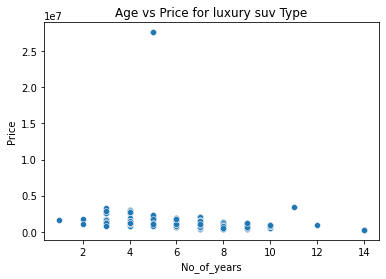

In [48]:
for i in df2["Type"].unique():
    plt.subplots()
    plt.title("Age vs Price for {} Type".format(i))
    sns.scatterplot(df2["No_of_years"],df2["Price"][df2["Type"]==i])

In [49]:
df2.head()

,Location,Type,Brand,Model,Variant,Kilometers,No_of_owners,Fuel,Transmission,Price,No_of_years
0,new delhi,hatchback,maruti,swift,lxi,3570,1,petrol,manual,580799,1
1,new delhi,hatchback,maruti,swift,lxi,1755,1,petrol,manual,571399,1
2,new delhi,hatchback,maruti,s presso,vxi plus,17058,1,petrol,manual,437299,1
3,new delhi,hatchback,maruti,alto 800,vxi,5383,1,petrol,manual,291699,7
4,new delhi,hatchback,maruti,alto k10,lxi,10957,1,petrol,manual,295299,6


In [51]:
for i in df2["Type"].unique():
    print(i,"\n", df2[["No_of_owners","Price"]][df2["Type"]==i].corr(),"\n")

hatchback 
               No_of_owners     Price
No_of_owners      1.000000 -0.163656
Price            -0.163656  1.000000 

sedan 
               No_of_owners     Price
No_of_owners      1.000000 -0.159631
Price            -0.159631  1.000000 

suv 
               No_of_owners     Price
No_of_owners      1.000000 -0.121687
Price            -0.121687  1.000000 

luxury sedan 
               No_of_owners     Price
No_of_owners      1.000000 -0.165986
Price            -0.165986  1.000000 

luxury suv 
               No_of_owners     Price
No_of_owners      1.000000 -0.066573
Price            -0.066573  1.000000 



it looks like prices of luxury suvs are not very much dependent on the no.of.owners.

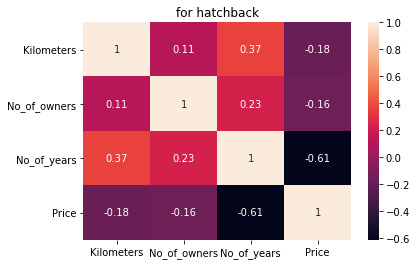

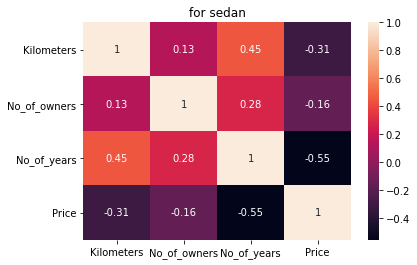

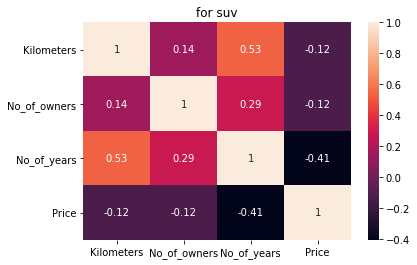

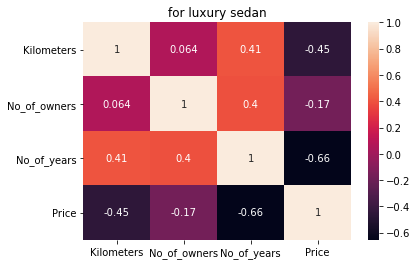

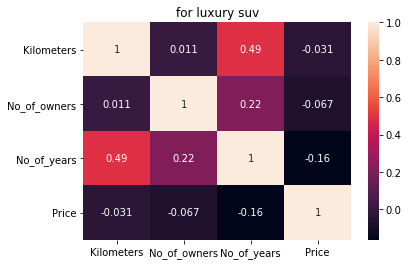

In [56]:
for i in df2["Type"].unique():
    plt.subplots()
    plt.title("for {}".format(i))
    sns.heatmap(df2[["Kilometers","No_of_owners","No_of_years","Price"]][df2["Type"]==i].corr(),annot=True)

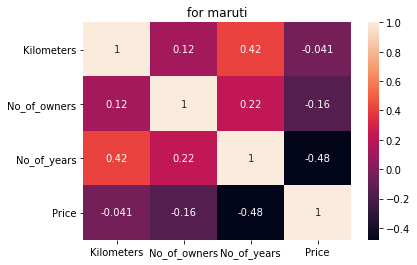

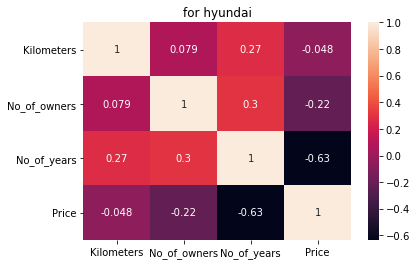

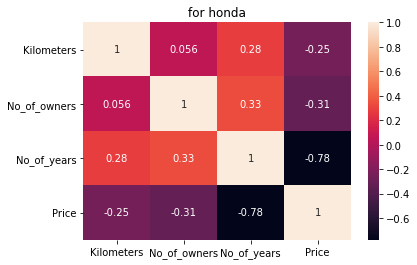

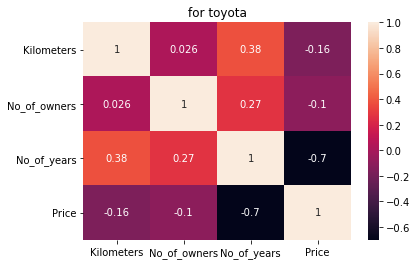

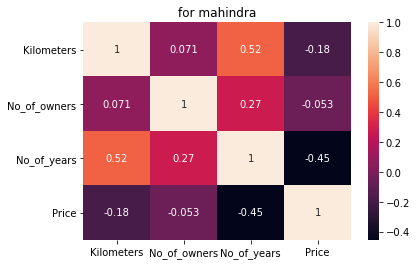

In [75]:
for i in df2["Brand"].value_counts()[0:5].index:
    plt.subplots()
    plt.title("for {}".format(i))
    sns.heatmap(df2[["Kilometers","No_of_owners","No_of_years","Price"]][df2["Brand"]==i].corr(),annot=True)

In [76]:
df3 = df2.copy()

In [77]:
df3.head()

,Location,Type,Brand,Model,Variant,Kilometers,No_of_owners,Fuel,Transmission,Price,No_of_years
0,new delhi,hatchback,maruti,swift,lxi,3570,1,petrol,manual,580799,1
1,new delhi,hatchback,maruti,swift,lxi,1755,1,petrol,manual,571399,1
2,new delhi,hatchback,maruti,s presso,vxi plus,17058,1,petrol,manual,437299,1
3,new delhi,hatchback,maruti,alto 800,vxi,5383,1,petrol,manual,291699,7
4,new delhi,hatchback,maruti,alto k10,lxi,10957,1,petrol,manual,295299,6


In [81]:
df3 = pd.get_dummies(data=df3,columns=['Location','Type','Brand','Model','Variant','Fuel','Transmission'])

In [83]:
df3.head()

,Kilometers,No_of_owners,Price,No_of_years,Location_ahmedabad,Location_bengaluru,Location_chennai,Location_gurgaon,Location_hyderabad,Location_kolkata,...,Variant_zxi opt amt,Variant_zxi plus,Variant_zxi plus amt,Variant_zxi plus shvs,Fuel_diesel,Fuel_petrol,Fuel_petrol + cng,Fuel_petrol + lpg,Transmission_automatic,Transmission_manual
0,3570,1,580799,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,1755,1,571399,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,17058,1,437299,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,5383,1,291699,7,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,10957,1,295299,6,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


except kilometers and price every other columns are in the range of 0-1 or nearer to it. Since, the prediction column price is very high in range,  the models will not be behaving as intended. Therefore, lets bring the difference between price and other columns range to as near as possible.

C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Kilometers', ylabel='Density'>

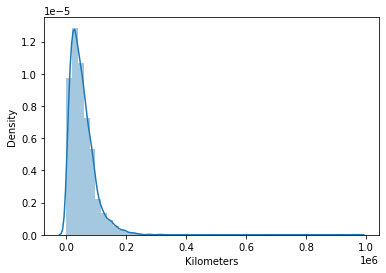

In [84]:
sns.distplot(df3["Kilometers"])

Looks like the density plot is indicating a skew. we will check the value

In [85]:
df3["Kilometers"].skew()

4.615566610186448

well the skewness is out of acceptable range for modelling ( -0.5 to 0.5)

C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Kilometers'>

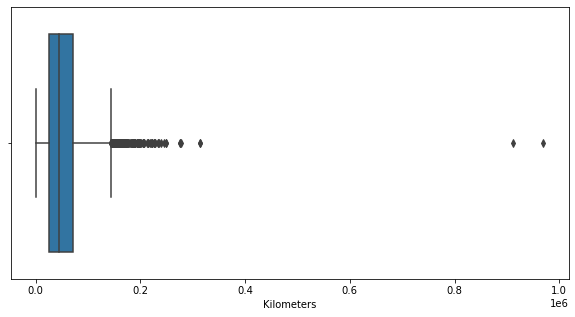

In [87]:
plt.figure(figsize=(10,5))
sns.boxplot(df3["Kilometers"])

It shows many outliers. dropping them would result in a dataloss and our dataset is of around 5k datapoints, it is not worth removing these outliers as dataloss would be huge

In [88]:
Q1 = df["Kilometers"].quantile(0.25)

Q3 = df["Kilometers"].quantile(0.75)

IQR = Q3 - Q1

Lower_Fence = Q1 - (1.5 * IQR)

Upper_Fence = Q3 + (1.5 * IQR)

In [89]:
Upper_Fence

143428.5

In [91]:
df3[df3["Kilometers"] > 143428.5].shape[0]

187

187 values are outliers

In [93]:
df2["Type"][df2["Kilometers"] > 143428.5].value_counts()

suv             65
luxury suv      54
sedan           34
luxury sedan    23
hatchback       11
Name: Type, dtype: int64

suv and luxury suv have many outliers. Since, kilometers is directly related to the resale price as checked with correlation, we will not be removing these outliers. Lets apply some transformations to reduce some skewness

In [97]:
k = np.sqrt(df3["Kilometers"])
k.skew()

0.6645191233932475

In [98]:
k = np.cbrt(df3["Kilometers"])
k.skew()

0.13952807857765004

cube root transformation brings the skewness under acceptable range for kilometers column. Now, lets check with the target column.

C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

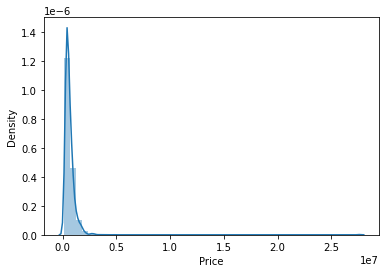

In [99]:
sns.distplot(df3["Price"])

Looks like the price column is also skewed

C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

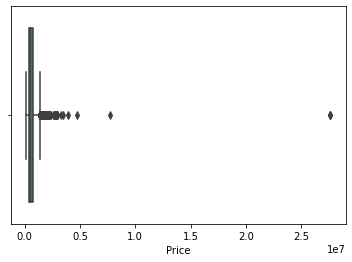

In [100]:
sns.boxplot(df3["Price"])

In [102]:
Q1 = df["Price"].quantile(0.25)

Q3 = df["Price"].quantile(0.75)

IQR = Q3 - Q1

Lower_Fence = Q1 - (1.5 * IQR)

Upper_Fence = Q3 + (1.5 * IQR)

Upper_Fence

1387049.0

In [103]:
df3[df3["Price"] > 1387049.0].shape[0]

256

256 outliers in the target column

In [104]:
df3["Price"].skew()

26.026303698017127

In [107]:
k = np.sqrt(df3["Price"])
print("sqrt",k.skew())
k = np.cbrt(df3["Price"])
print("cbrt",k.skew())
k = np.log(df3["Price"])
print("log",k.skew())

sqrt 4.742716040805783
cbrt 2.314288954089774
log 0.6228602194771755


log transformation is good for the price column

In [108]:
df2["Type"][df2["Price"] > 1387049.0].value_counts()

luxury suv      106
luxury sedan     83
suv              62
sedan             5
Name: Type, dtype: int64

Luxury suv and luxury sedan are having much higher prices which are outliers

In [114]:
df3["No_of_years"].skew()

0.350257824087146

years skew is acceptable

In [115]:
df3["Kilometers"] = np.cbrt(df3["Kilometers"])
df3["Price"] = np.log(df3["Price"])

In [116]:
df4 = df3.copy()
df4.head()

,Kilometers,No_of_owners,Price,No_of_years,Location_ahmedabad,Location_bengaluru,Location_chennai,Location_gurgaon,Location_hyderabad,Location_kolkata,...,Variant_zxi opt amt,Variant_zxi plus,Variant_zxi plus amt,Variant_zxi plus shvs,Fuel_diesel,Fuel_petrol,Fuel_petrol + cng,Fuel_petrol + lpg,Transmission_automatic,Transmission_manual
0,15.283497,1,13.272160,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,12.062177,1,13.255843,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,25.742025,1,12.988372,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,17.525677,1,12.583478,7,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,22.210784,1,12.595744,6,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


Since, the target variable is a continuous variable this is a regression problem.

In [126]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge, HuberRegressor, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [118]:
x = df4.drop(columns=["Price"])
y = df4.Price

In [119]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=55)

In [120]:
xtrain.shape

(3531, 855)

In [122]:
xtest.shape

(1514, 855)

In [130]:
models = [LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR()]

for model in models:
    
    m = model
    m.fit(xtrain,ytrain)
    pred = m.predict(xtest)
    mae = mean_absolute_error(ytest,pred)
    mse = mean_squared_error(ytest,pred)
    r2 = r2_score(ytest,pred)
    
    print(m)
    print("mae :", mae)
    print("mse :", mse)
    print("r2 :",r2 ,"\n")
    

LinearRegression()
mae : 1318526.5520722955
mse : 69312595968256.21
r2 : -245169634022120.34 

DecisionTreeRegressor()
mae : 0.0835050531457876
mse : 0.024406651782729716
r2 : 0.9136698055860201 

KNeighborsRegressor()
mae : 0.14914278953701948
mse : 0.05100965291071567
r2 : 0.8195707755421092 

SVR()
mae : 0.17591196932616465
mse : 0.06658322616697258
r2 : 0.7644845794140367 



linear regression is not performing well as it can be seen its mae values are so high. This may be beacuse of two possible reasons:
1) Many predictors are categorical (can be seen decision trees doing well)

2) Few outliers with high prices for types of luxury sedan and luxury suv

In [128]:
models = [DecisionTreeRegressor(),KNeighborsRegressor(),SVR()]

for model in models:
    
    m = model
    m.fit(xtrain,ytrain)
    pred = m.predict(xtest)
    r2 = r2_score(ytest,pred)
    
    cvs = cross_val_score(m,x,y,scoring='r2',cv=5)
    print(m)
    print("diff w.r.t r2 score", (cvs.mean() - r2))

DecisionTreeRegressor()
diff w.r.t r2 score -0.050929113958342764
KNeighborsRegressor()
diff w.r.t r2 score -0.052463214470458985
SVR()
diff w.r.t r2 score -0.033939591898988875


These three models are performing well with a difference between r2 score and cross val score or near to 0.05

Lets check with few other models

In [129]:
models = [ElasticNet(), Lasso(), Ridge(), HuberRegressor(), BayesianRidge()]

for model in models:
    
    m = model
    m.fit(xtrain,ytrain)
    pred = m.predict(xtest)
    mae = mean_absolute_error(ytest,pred)
    mse = mean_squared_error(ytest,pred)
    r2 = r2_score(ytest,pred)
    
    print(m)
    print("mae :", mae)
    print("mse :", mse)
    print("r2 :",r2 ,"\n")

ElasticNet()
mae : 0.4019487721860043
mse : 0.25378541192651843
r2 : 0.10232078754237439 

Lasso()
mae : 0.43037663139364196
mse : 0.2827424088120287
r2 : -0.0001046984696000397 

Ridge()
mae : 0.08859626635408
mse : 0.01829046573528479
r2 : 0.9353037247015301 



C:\Users\AKHIL\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


HuberRegressor()
mae : 0.1693207946547118
mse : 0.10895468788289119
r2 : 0.6146100058714201 

BayesianRidge()
mae : 0.08643198529045013
mse : 0.01854083842406821
r2 : 0.934418116831551 



Till Now, Decision Tree, Ridge and Bayesian Ridge have r2_score of above 0.90

In [131]:
models = [Ridge(),BayesianRidge()]

for model in models:
    
    m = model
    m.fit(xtrain,ytrain)
    pred = m.predict(xtest)
    r2 = r2_score(ytest,pred)
    
    cvs = cross_val_score(m,x,y,scoring='r2',cv=5)
    print(m)
    print("diff w.r.t r2 score", (cvs.mean() - r2))

Ridge()
diff w.r.t r2 score -0.028986652670342727
BayesianRidge()
diff w.r.t r2 score -0.02757703257078581


Ridge and Bayesian Ridge shows less diff between r2 score and cross val score compared to decision trees

In [132]:
boosting = [RandomForestRegressor(), AdaBoostRegressor(), GradientBoostingRegressor() ,XGBRegressor()]
for model in boosting:
    
    m = model
    m.fit(xtrain,ytrain)
    pred = m.predict(xtest)
    mae = mean_absolute_error(ytest,pred)
    mse = mean_squared_error(ytest,pred)
    r2 = r2_score(ytest,pred)
    
    print(m)
    print("mae :", mae)
    print("mse :", mse)
    print("r2 :",r2 ,"\n")

RandomForestRegressor()
mae : 0.07801284137808161
mse : 0.01619767516585129
r2 : 0.9427062565332327 

AdaBoostRegressor()
mae : 0.23320297024734044
mse : 0.08550134285827933
r2 : 0.6975682032373367 

GradientBoostingRegressor()
mae : 0.13272628733225472
mse : 0.03280826356339335
r2 : 0.8839519735428427 

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
mae : 0.0841586618023667
mse : 0.016365710856674275
r2 : 0.9421118876707449 



Random forest and XGB boosting techniques are doing good

In [137]:
for model in (boosting[0],boosting[-1]):
    
    m = model
    m.fit(xtrain,ytrain)
    pred = m.predict(xtest)
    r2 = r2_score(ytest,pred)
    
    cvs = cross_val_score(m,x,y,scoring='r2',cv=5)
    print(m)
    print("diff w.r.t r2 score", (cvs.mean() - r2))

RandomForestRegressor()
diff w.r.t r2 score -0.03658268921526786
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
diff w.r.t r2 score -0.03467411303877943


# in order ranking 1 - 4

considering r2_score - random forest, xgb regressor, Ridge, Bayesian Ridge (all > 0.93)

considering diff b/w cvs and r2 - Bayesian Ridge, Ridge, xgb regressor, random forest (all < 0.04)

considering mae - Random forest, XGB,  Bayesian Ridge, Ridge

cosidering mse - Random forest, XGB, Ridge, Bayesian Ridge

All the models performances are near to each others. Since, in most of the scenarios random forest is ranked 1, we will tune parameters for it and check its performance.

In [140]:
params  = {'n_estimators' : [300, 500, 700, 1000, 2100],
            'max_depth' : [3, 5, 7, 9, 11, 13, 15],
            'max_features' : ["auto", "sqrt", "log2"],
            'min_samples_split' : [2, 4, 6, 8]}


gcv = GridSearchCV(RandomForestRegressor(),param_grid = params, scoring ='r2', cv=5)

gcv.fit(x,y)

gcv.best_params_

{'max_depth': 15,
 'max_features': 'auto',
 'min_samples_split': 2,
 'n_estimators': 1000}

In [141]:
final_model = RandomForestRegressor(n_estimators = 1000, max_depth = 15, max_features = 'auto', min_samples_split = 2)

final_model.fit(x,y)

RandomForestRegressor(max_depth=15, n_estimators=1000)

In [142]:
final_model.score(x,y)

0.983695692640654

In [145]:
import pickle
filename = "cars_price_prediction.pkl"

pickle.dump(final_model,open(filename , "wb"))